# Synthetic data

We simulated a differentiation process over a bifurcation fork. In this simulation, 
cells are barcoded in the beginning, and the barcodes remain un-changed. In the simulation we resample clones over time, like the experimental design to obtain the hematopoietic dataset 
or the reprogramming dataset. The dataset has two time points.  

In [1]:
import sys
import os
new_path=os.getcwd()+"/CoSpar/"
sys.path.append(new_path)

import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity=2
cs.settings.set_figure_params(format='png',dpi=75,fontsize=14) # use png to reduce file size. 

Running cospar 0.0.11 (python 3.6.12) on 2021-04-14 12:30.


In [3]:
cs.settings.data_path='test' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='test' # A relative path to save figures. If not existed before, create a new one.


## Loading data

In [4]:
adata_orig=cs.datasets.synthetic_bifurcation()

In [5]:
adata_orig

AnnData object with n_obs × n_vars = 2474 × 50
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

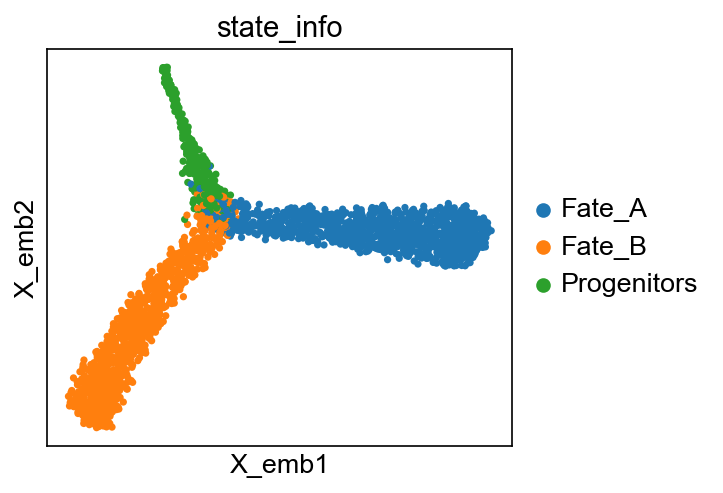

<Figure size 450x300 with 0 Axes>

In [6]:
cs.pl.embedding(adata_orig,color='state_info')

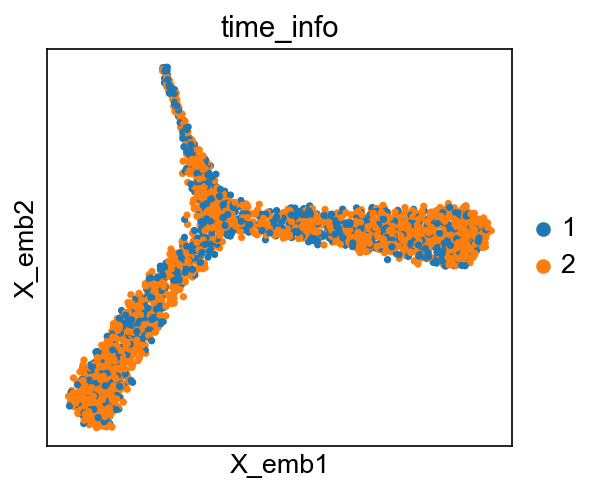

<Figure size 450x300 with 0 Axes>

In [7]:
cs.pl.embedding(adata_orig,color='time_info')

## Basic clonal analysis

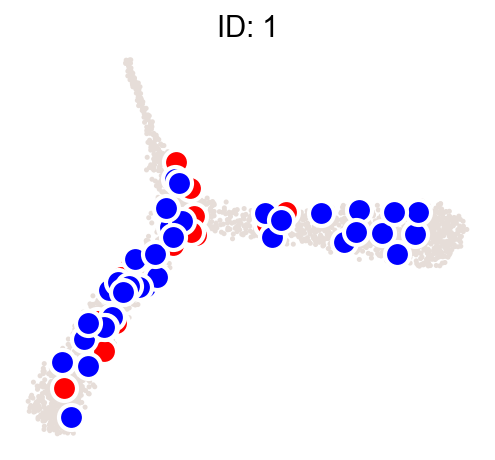

In [8]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1])

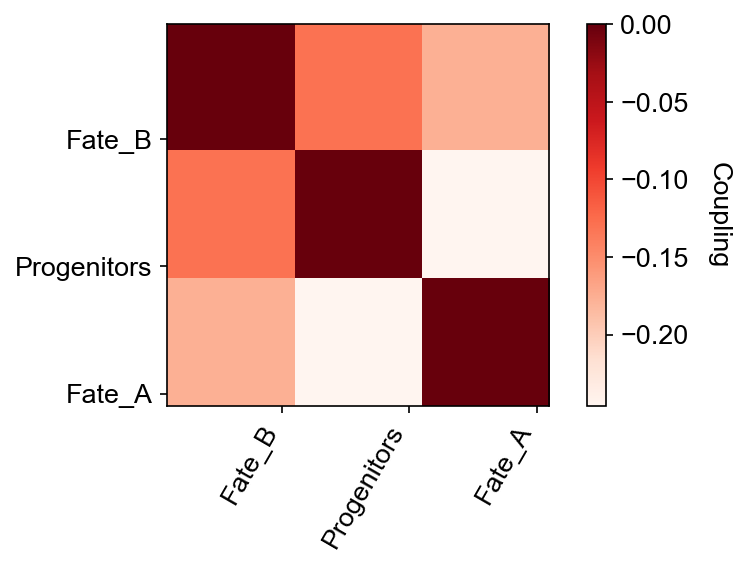

In [9]:
coupling=cs.pl.fate_coupling_from_clones(adata_orig,selected_times='2', color_bar=True)

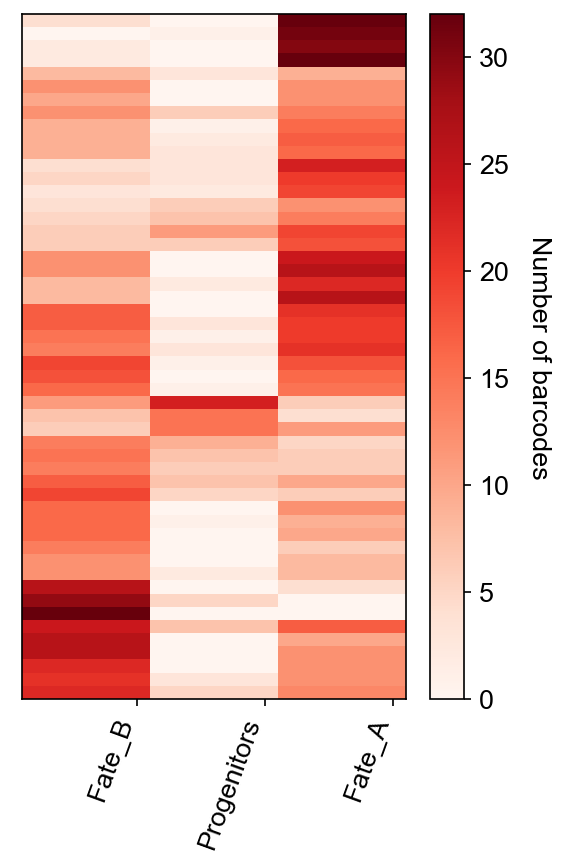

In [10]:
cs.pl.barcode_heatmap(adata_orig,selected_times='2', color_bar=True)

Current clone id: 0
Current clone id: 50


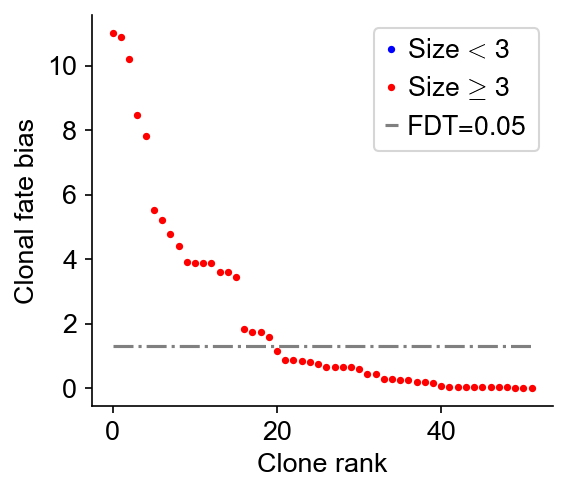

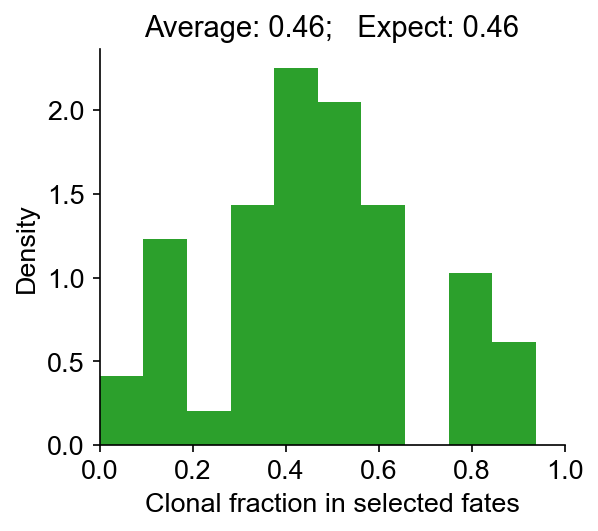

In [11]:
results=cs.pl.clonal_fate_bias(adata_orig,selected_fate='Fate_A')

In [12]:
results[:5]

,Clone ID,Clone size,Q_value,Fate bias
0,33,48.0,9.394183e-12,11.027141
1,46,49.0,1.279980e-11,10.892797
2,11,49.0,6.244616e-11,10.204494
3,42,48.0,3.394785e-09,8.469188
4,21,48.0,1.450342e-08,7.838530


## Transition map inference

### Transition map from multiple clonal time points.

In [13]:
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,clonal_time_points=['1','2'],smooth_array=[10,10,10],
            CoSpar_KNN=20,sparsity_threshold=0.2)

Current time ordering from simple sorting: ['1' '2']
------Compute the full Similarity matrix if necessary------
----Infer transition map between neighboring time points-----
Step 1: Select time points
Number of multi-time clones post selection: 52
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=10
Iteration 2, Use smooth_round=10
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.96
-----------Total used time: 1.5773110389709473 s ------------


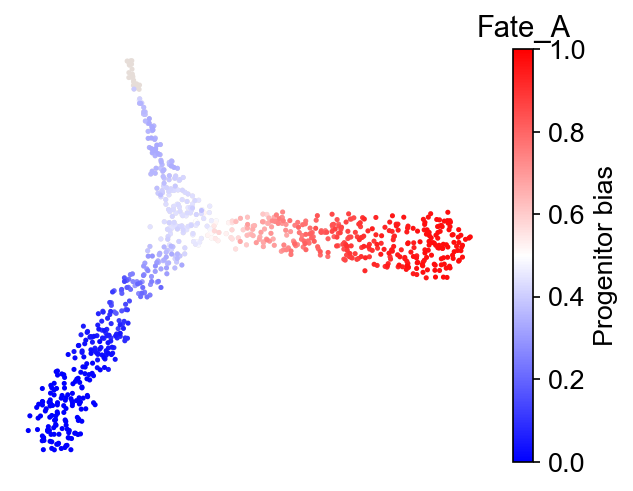

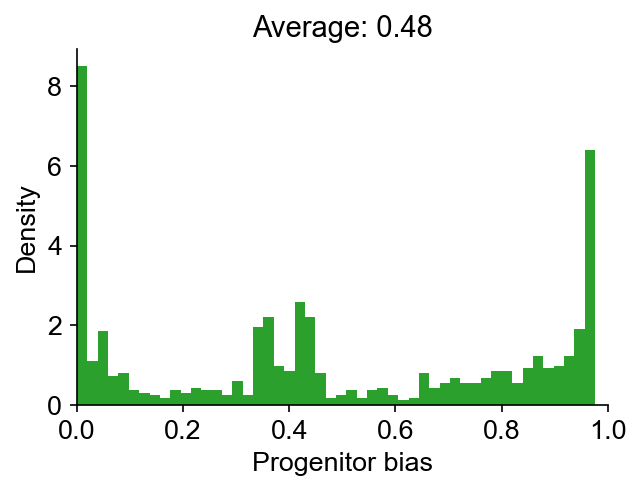

In [14]:
cs.pl.fate_bias(adata,selected_fates=['Fate_A','Fate_B'],used_Tmap='transition_map',
            plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.01)

### Transition map from a single clonal time point

In [15]:
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points=['1'],later_time_point='2',
    initialize_method='OT',smooth_array=[10,10,10],
                        sparsity_threshold=0.2,compute_new=False)

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 1--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use OT method for initialization-------
Load pre-computed custom OT matrix
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=10
Iteration 2, Use smooth_round=10
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.98
Convergence (JointOpt, iter_N=1): corr(previous_T, current_T)=0.096
-----JointOpt Iteration 2: Infer initial clonal structure
-----JointOpt Iteration 2: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=10
Iteration 2, Use smooth_round=10
Iteration 3, Use smooth_round=10
Conve

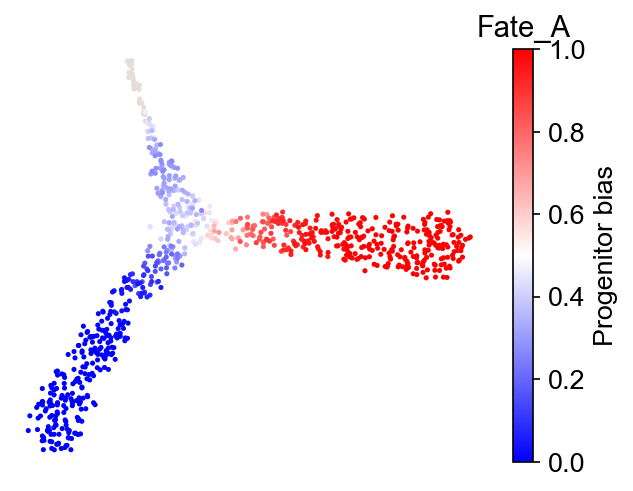

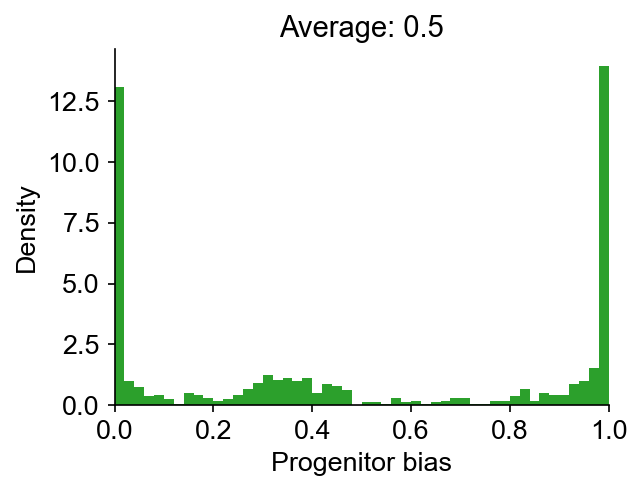

In [16]:
cs.pl.fate_bias(adata,selected_fates=['Fate_A','Fate_B'],used_Tmap='transition_map',
            plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.005)

### Transition amp from only the clonal information

Infer transition map between neighboring time points.
Number of multi-time clones post selection: 52
Use all clones (naive method)


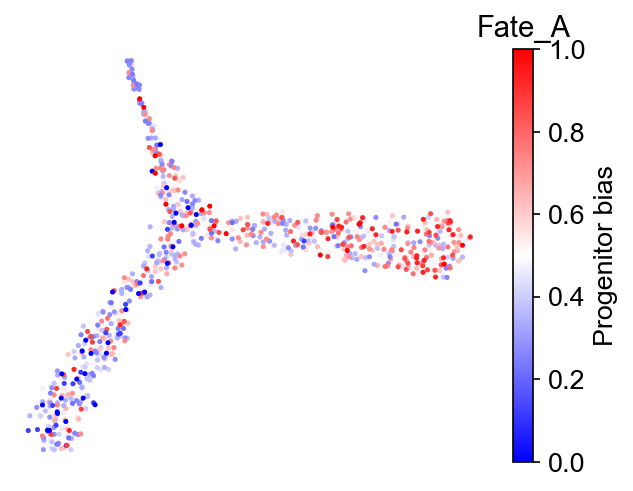

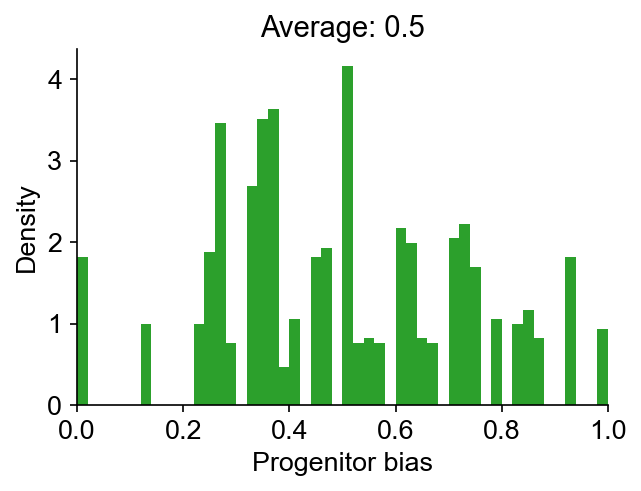

In [17]:
adata=cs.tmap.infer_Tmap_from_clonal_info_alone(adata_orig)

cs.pl.fate_bias(adata,selected_fates=['Fate_A','Fate_B'],used_Tmap='clonal_transition_map',
            plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.01)